# BIOS 512 Final Project

How Sustainable Is Fishing?

By: Michael Zhang

Link to Data: https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-10-12/readme.md

In [1]:
library('tidyverse')

project_data = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-10-12/capture-fisheries-vs-aquaculture.csv')
colnames(project_data) = c('country', 'code', 'year', 'aquaculture_prod', 'fishery_prod')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


── Column specification ────────────────────────────────────────────────────────
cols(
  Entity = col_character(),
  Code = col_character(),
  Year = col_double(),
  `Aquaculture production (metric tons)` = col_double(),
  `Capture fisheries production (metric tons)` = col_double()
)




As the world population has grown exponentially in the last decade, so has resource consumption. One of the primary resources which humans depend on across the world is fish. However, as we know, Earth does not have unlimited resources to support us, and so as we keep consuming increasing amounts of fish, we may be depleting the fish population. Since fish are a key player in our planet's marine environment, as well as the diets of people across the world, we need to ask ourselves, are we being sustainable?

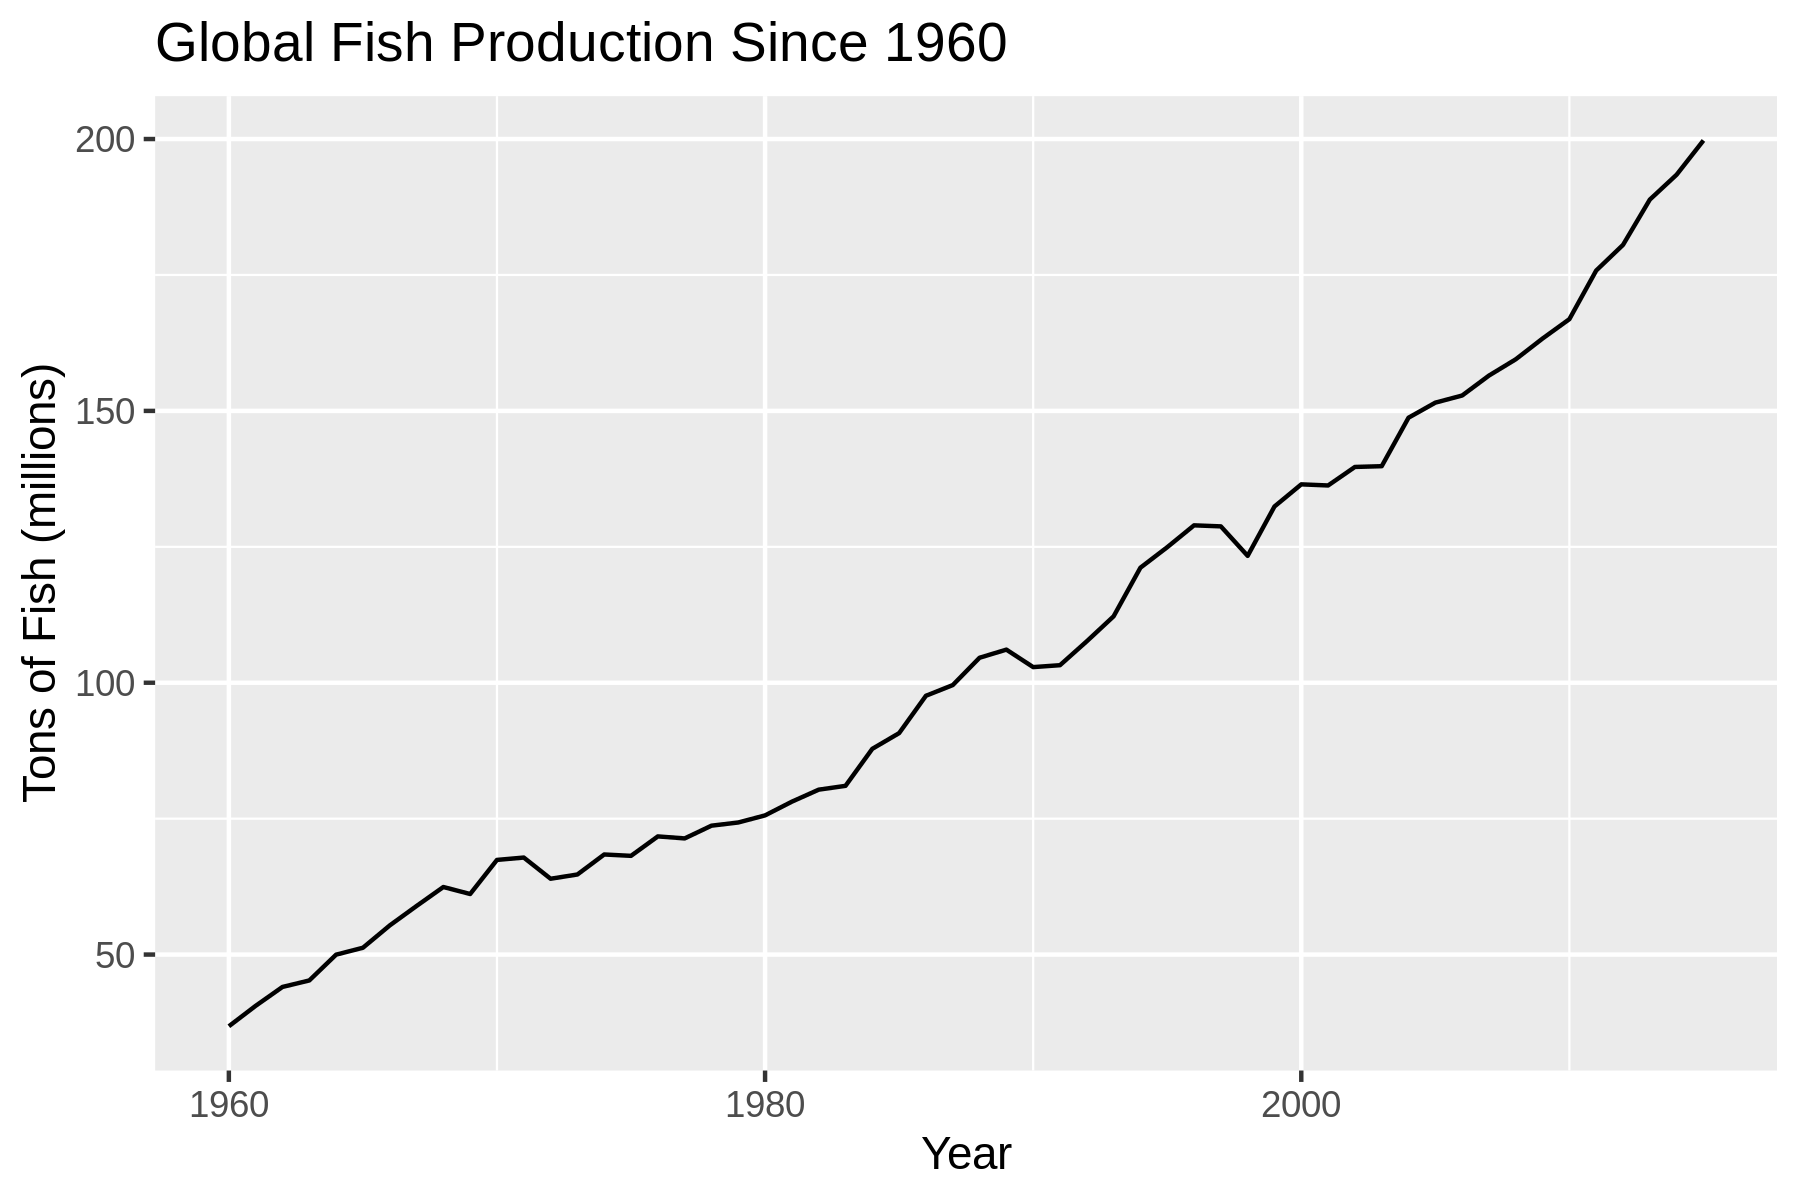

In [48]:
data_world = project_data[which(project_data$country=='World'),]
options(repr.plot.width=6, repr.plot.height=4)
p = ggplot(data_world, aes(x=year, y=((aquaculture_prod+fishery_prod)/1000000)))
p = p + geom_line() + ggtitle("Global Fish Production Since 1960") + xlab("Year") + ylab("Tons of Fish (millions)")
p

From the graph above, we can see that the consumption of fish by humans have increasing substantially since 1960, over four-fold. But the oceans haven't gotten any bigger, and the productivity of the oceans hasn't increased. While scientist are not sure exactly how much fishing our planet can sustain, we should begin thinking sooner than later how to preserve these precious resources. 

Before diving into any data analysis, we need to understand the two primary forms of fish production across the world - Fisheries and Aquaculture. The form in which you are probably most familiar is fisheries. Fisheries simply catch wild fish from bodies of water. Aquaculture, however, refers to the idea of "fish farming". This process is done by portioning off existing habitats or creating new aquatic habitats for the sole purpose of breeding, raising, and harvesting fish. In general, aquaculture has been identified as the most sustainable form of fish production since it doesn't deplete the natural fish populations across the world. 

From the above graph, we can see that at the most recent data collection point in 2018, the world produced approximately 200 million tons of fish. However, not all countries comsume similar amounts of these fish. Countries that consume more fish will  have a much larger impact on the fish populations around the world. Let's take a look at the largest consumers of fish across the world.

In [12]:
data_2018 = project_data[which(project_data$year==2018 & project_data$code!='NA'),]
data_2018_1 = data_2018 %>% mutate(total_prod = aquaculture_prod + fishery_prod)
data_2018_2 = data_2018_1[order(data_2018_1$total_prod, decreasing=TRUE),]
data_2018_3 = data_2018_2 %>% top_n(10)
data_2018_4 = data_2018_3 %>% pivot_longer(cols = c(aquaculture_prod, fishery_prod))

Selecting by total_prod



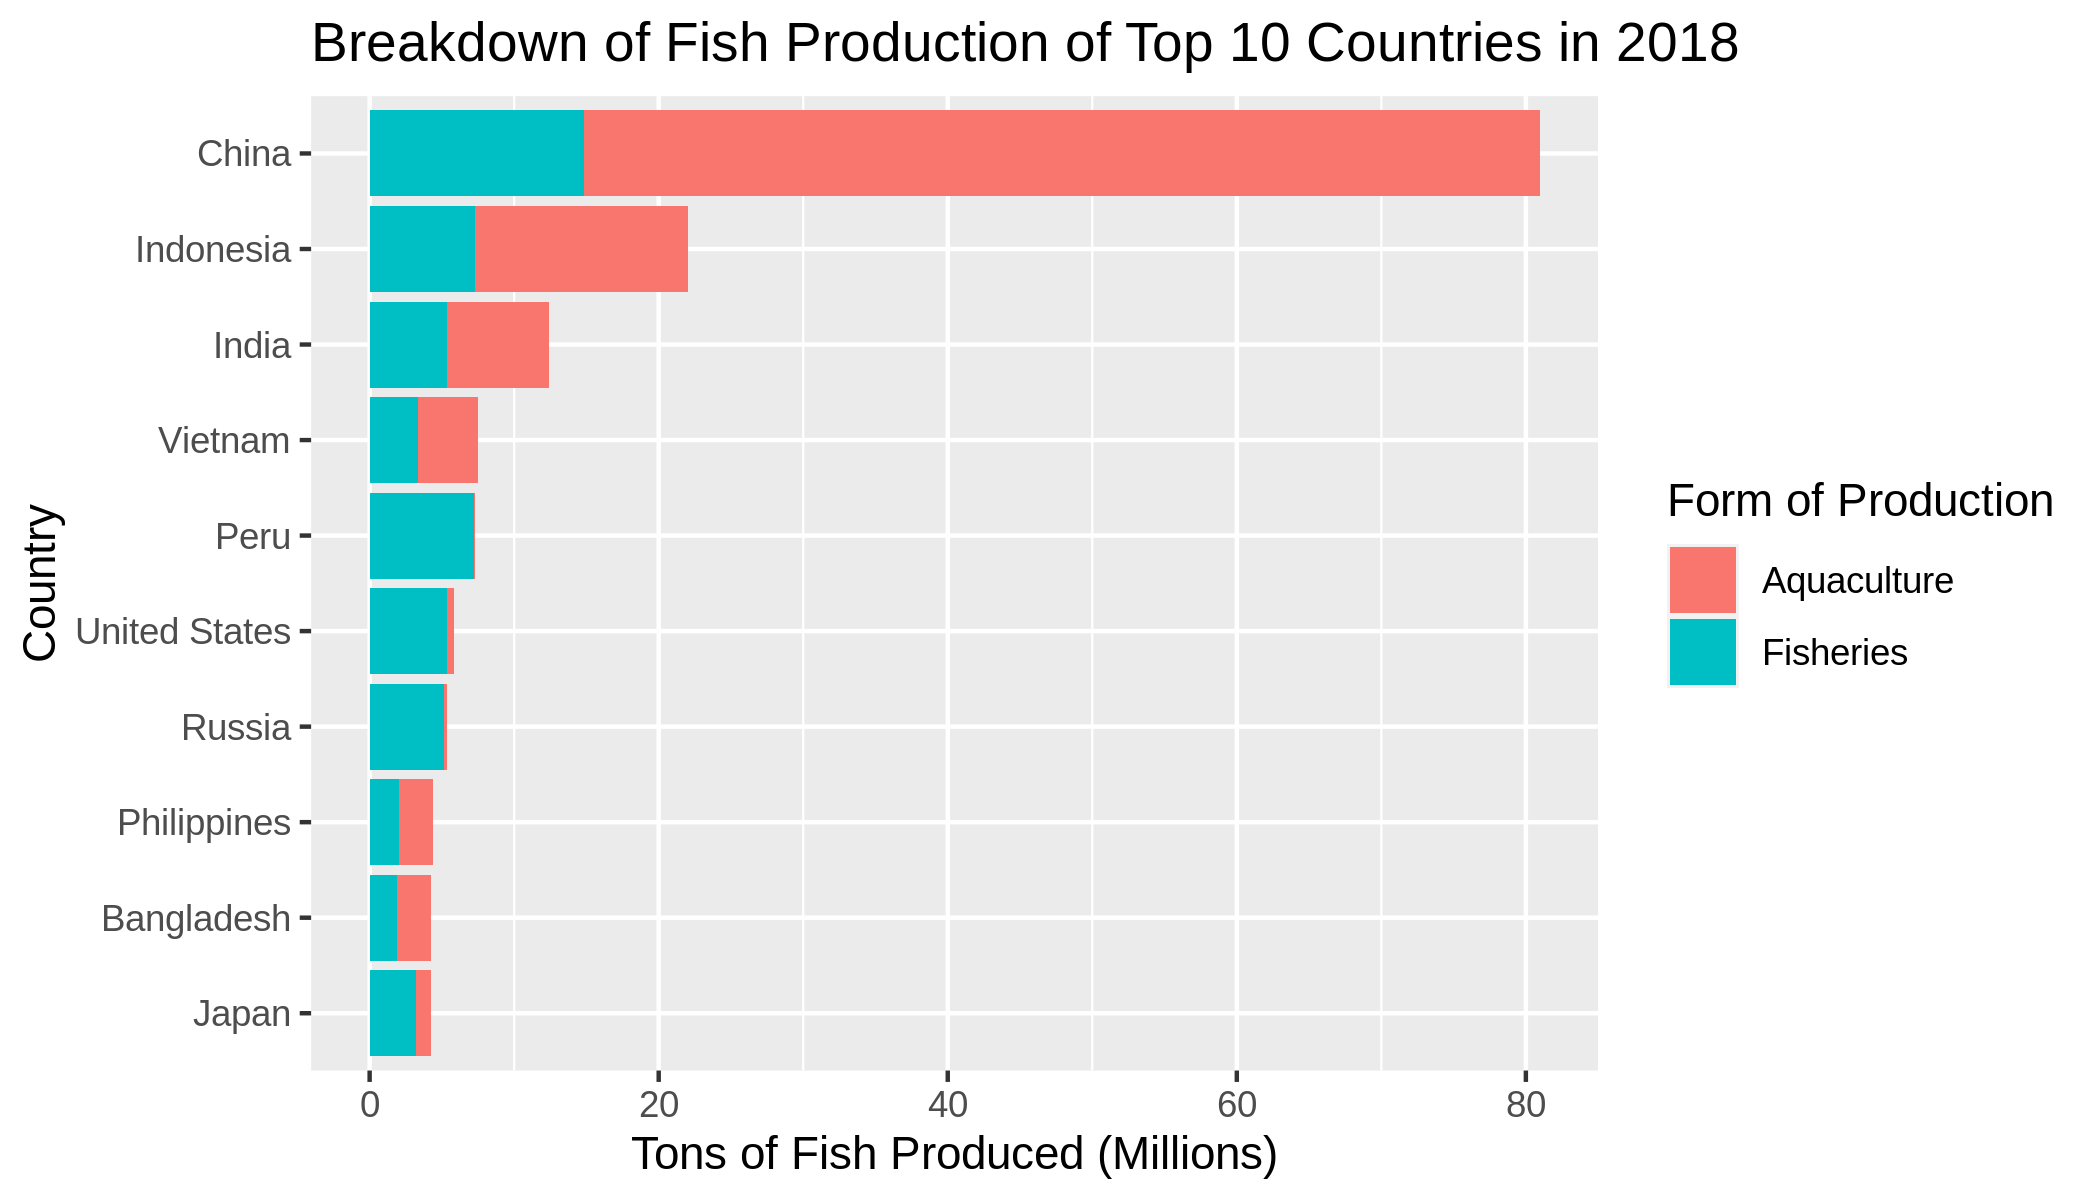

In [21]:
options(repr.plot.width=7, repr.plot.height=4)
p = ggplot(data_2018_4, aes(x=reorder(country, total_prod), y=(value/1000000), fill=name))
p = p + geom_bar(stat = "identity") + coord_flip()
p = p + labs(title = "Breakdown of Fish Production of Top 10 Countries in 2018", y="Tons of Fish Produced (Millions)", x="Country")
p = p + scale_fill_discrete(name="Form of Production", labels = c("Aquaculture", "Fisheries"))
p

From the chart above, it is clear that in 2018, China is by far the world's largest consumer of fish, followed not-so-closely by Indonedia, India, and Vietnam. The top 10 countries make up more than half of the world's fish production and thus have a significant impact on the future of fish stocks. The United States ranks at the world's sixth largest consumer of fish.

If we look closely, the proportion of fish production is these top 10 countries varies, but one thing holds common in the top 4 countries - the majority of their fish production comes from aquaculture. This is more sustainable and helps keeps marine ecosystems from depletion of fish. However, does this mean that they are doing a great job being sustainable? What about other countries across the world - are they producing more of their fish from aquaculture?

In [23]:
data_2018_percent = data_2018_2 %>% mutate(percent_aqua = aquaculture_prod/total_prod*100)
data_2018_percent_2 = data_2018_percent[order(data_2018_percent$percent_aqua, decreasing=TRUE),]
data_2018_percent_3 = data_2018_percent_2 %>% top_n(10)

Selecting by percent_aqua



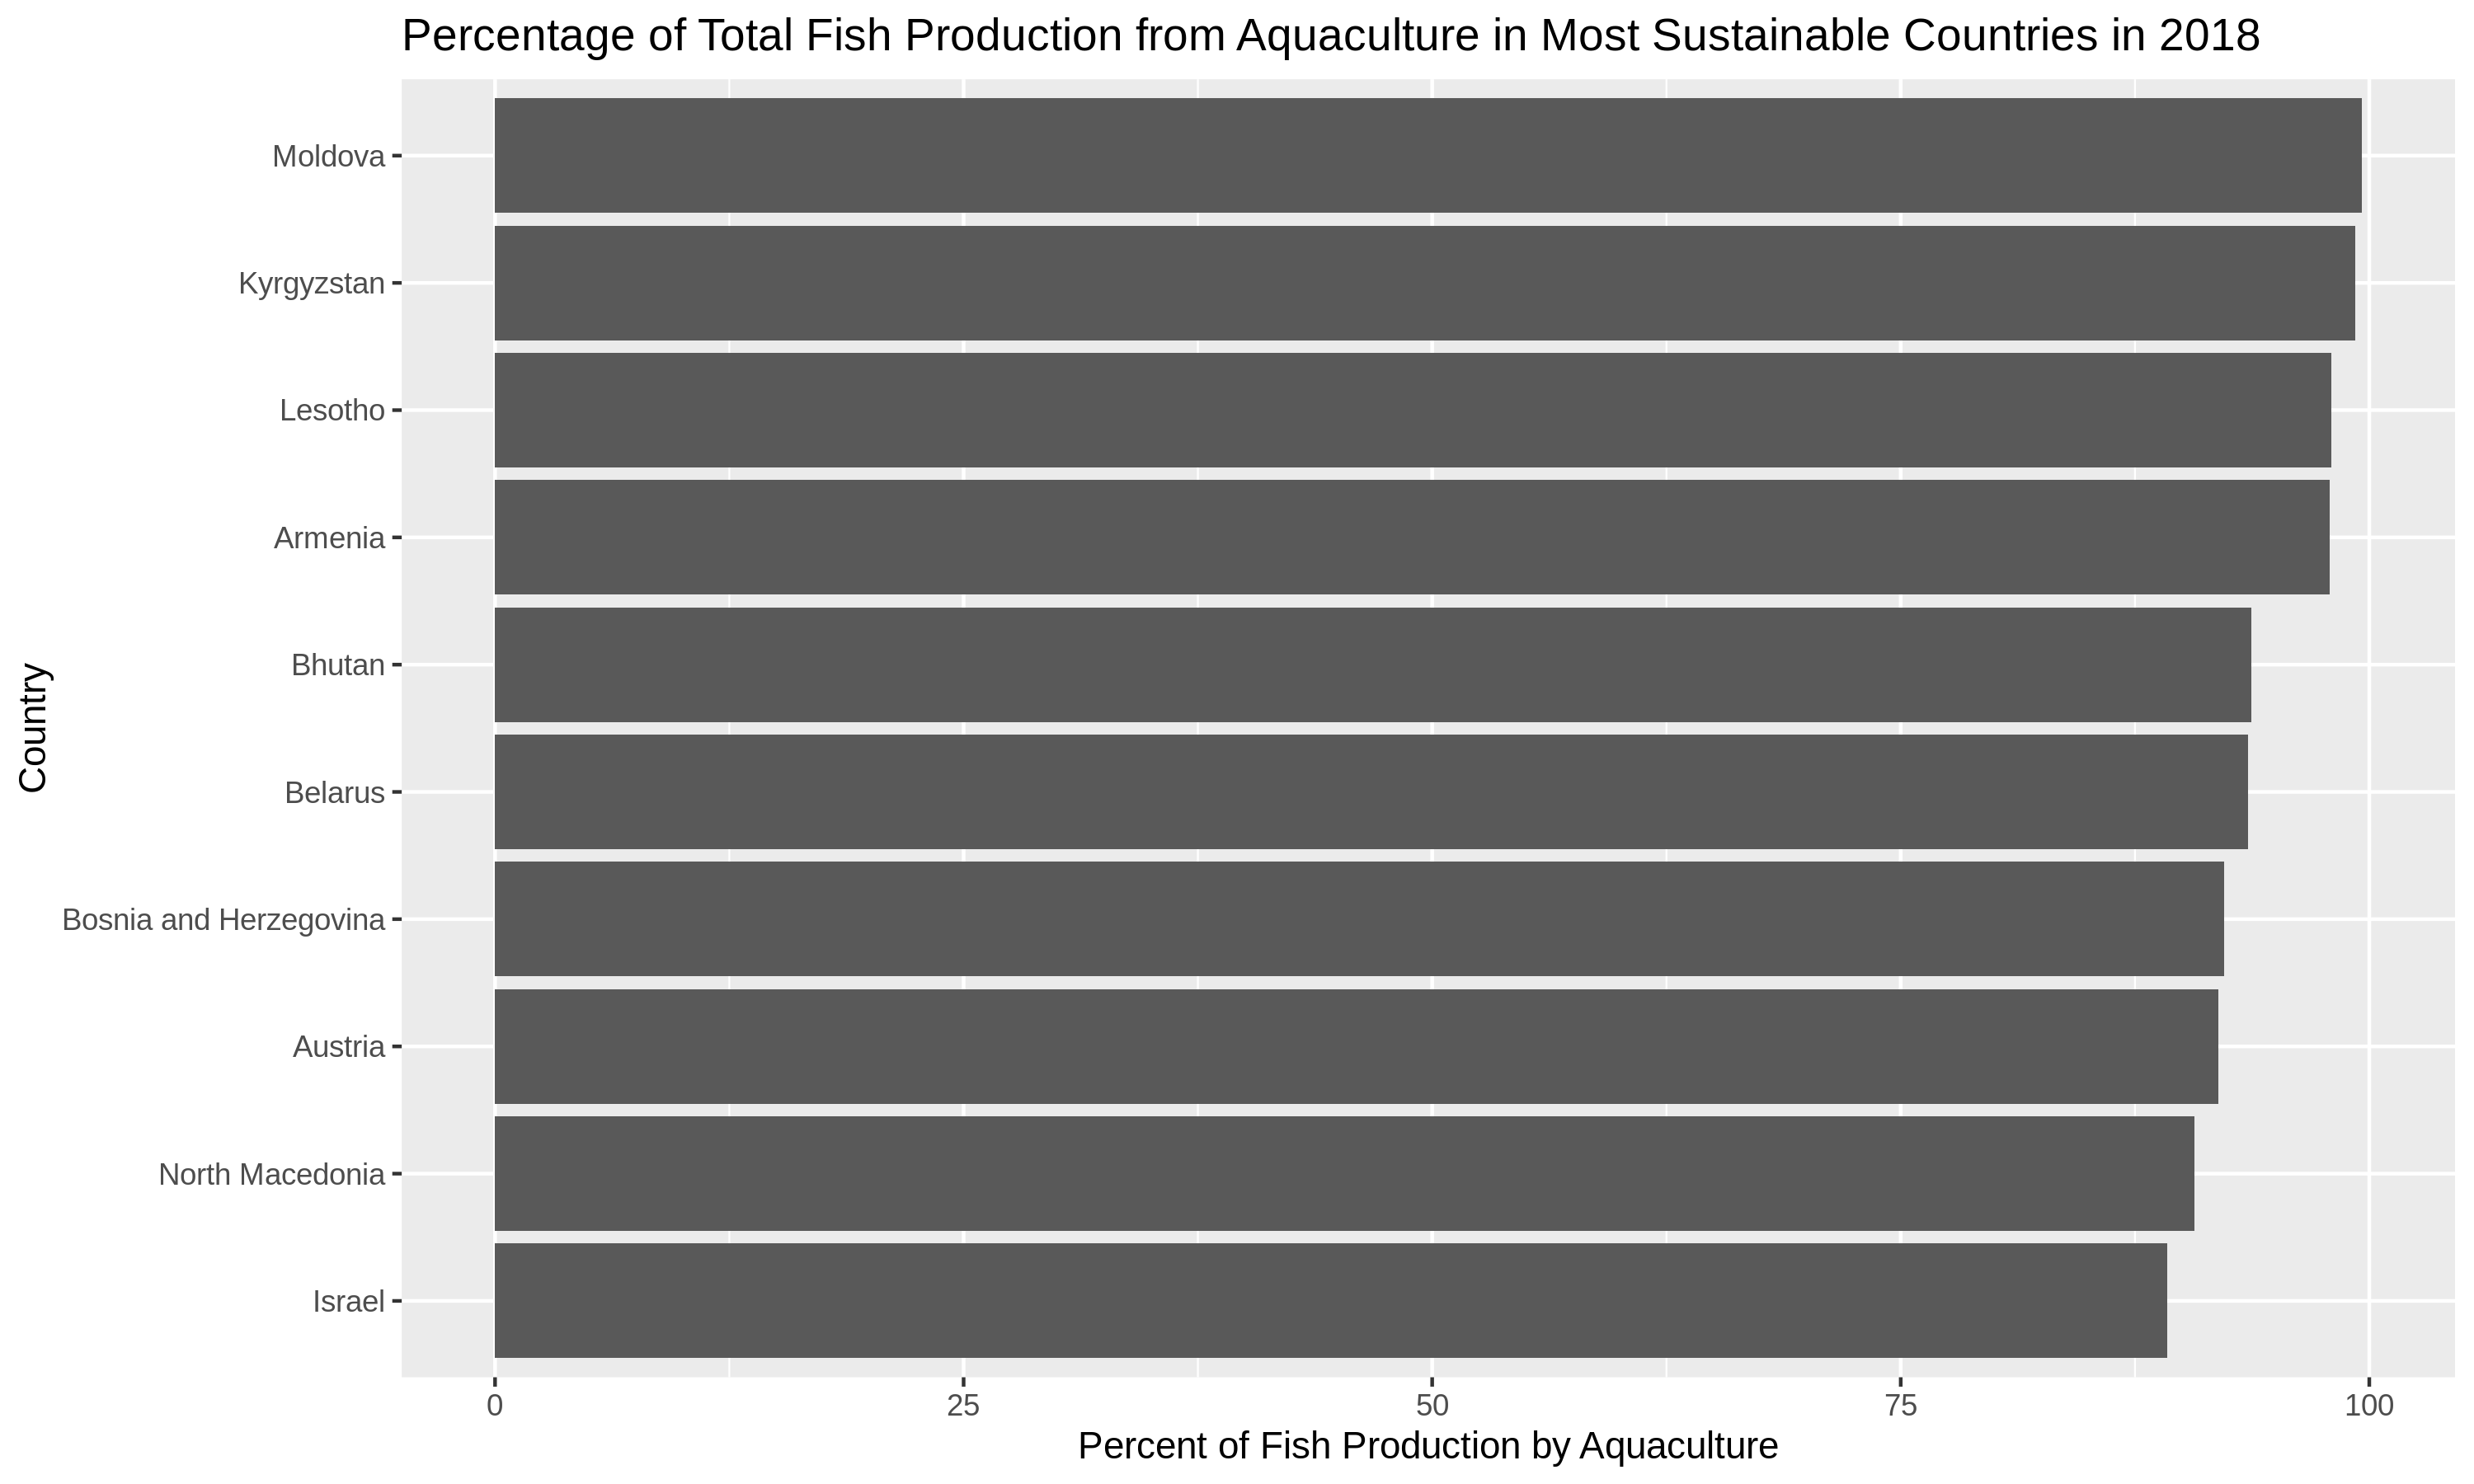

In [27]:
options(repr.plot.width=10, repr.plot.height=6)

p = ggplot(data_2018_percent_3, aes(x=reorder(country, percent_aqua), y=percent_aqua))
p = p + geom_bar(stat = "identity") + coord_flip()
p = p + labs(title = "Percentage of Total Fish Production from Aquaculture in Most Sustainable Countries in 2018", y="Percent of Fish Production by Aquaculture", x="Country")
p

In 2018, these ten countries had the highest proportion of their total fish production coming from aquaculture. It's important to note that of these top 10 countries, none of them support a massive population compared to the top 10 countries of fish production. However, they do suggest that there is a way to sustainably produce fish for an entire country.

Of the top 10 most sustainable fishing countries, Isreal ranks as number 10, and produces approximately 90% of its total fish production through aquaculture. How does this stack against the current world leaders in fish production?

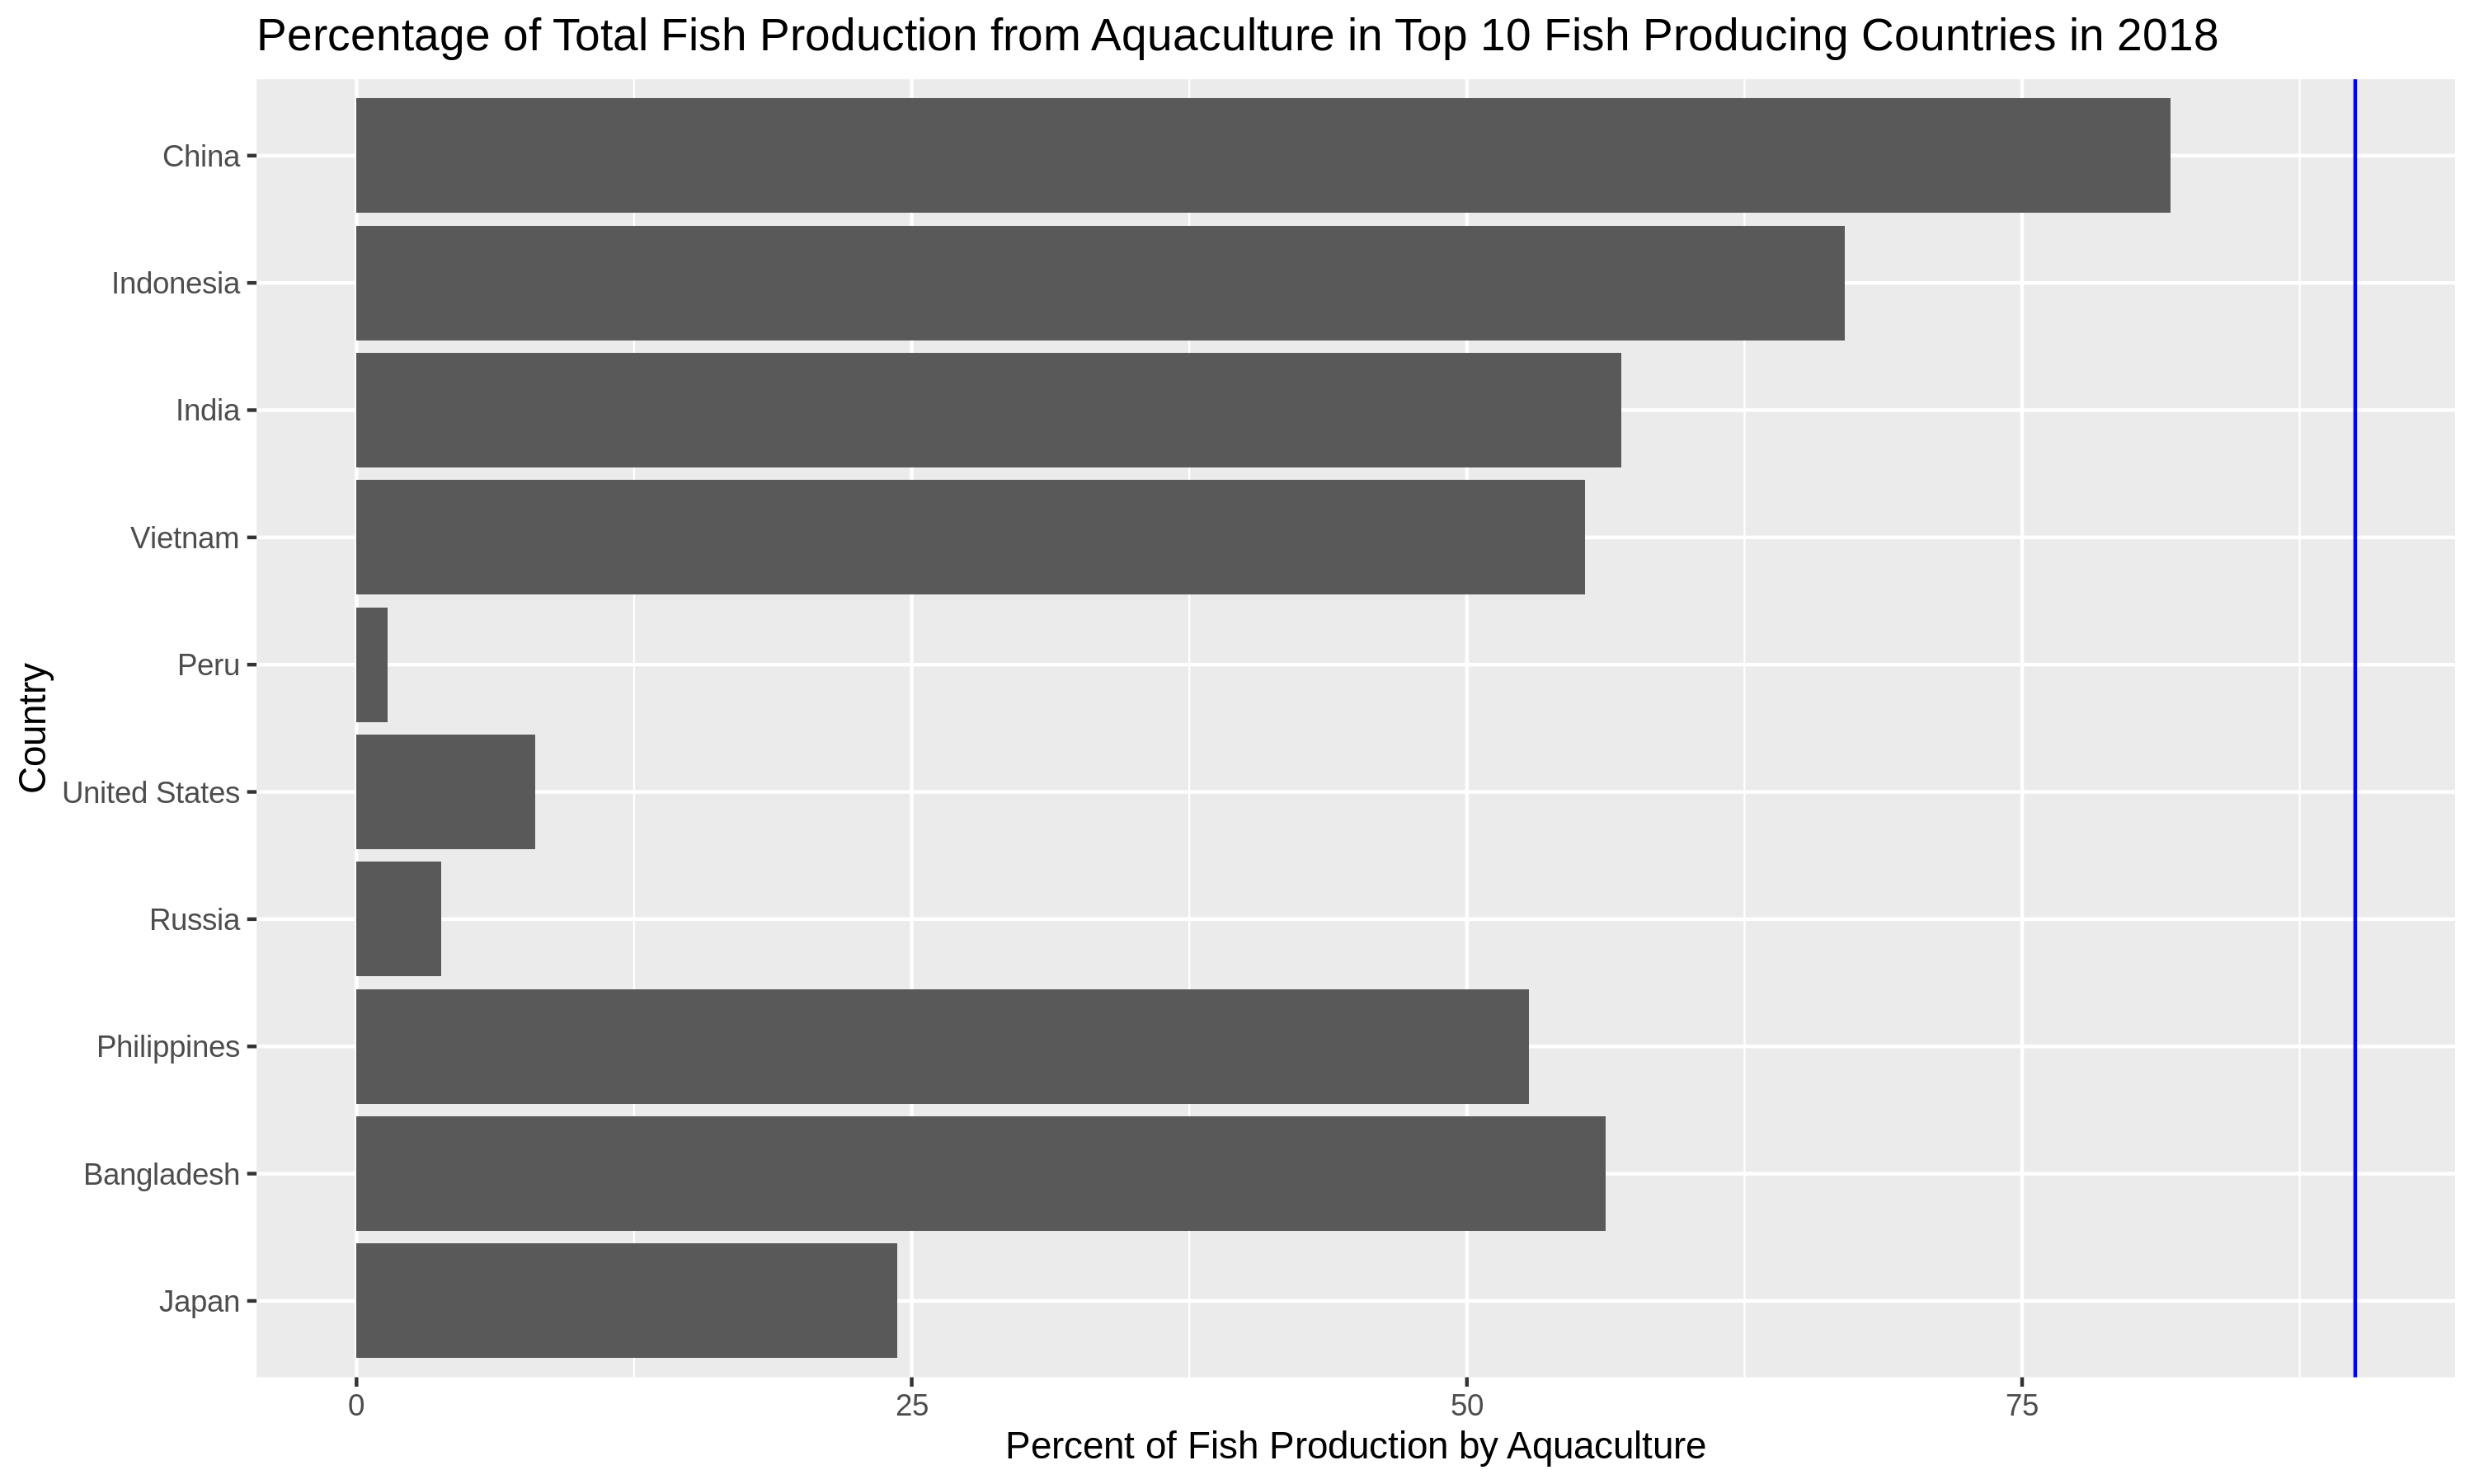

In [28]:
data_2018_4 = data_2018_3 %>% mutate(percent_aqua = aquaculture_prod/total_prod*100)
p = ggplot(data_2018_4, aes(x=reorder(country, total_prod), y=percent_aqua))
p = p + geom_bar(stat = "identity") + coord_flip()
p = p + geom_hline(yintercept=90, color="blue")
p = p + labs(title = "Percentage of Total Fish Production from Aquaculture in Top 10 Fish Producing Countries in 2018", y="Percent of Fish Production by Aquaculture", x="Country")
p

It is clear that the world leaders in fish production are not quite at Isreal's level of sustainable fish production yet. However, China is getting very close, with over 80% of their fish production occuring through aquaculture. Indonesia, India, Vietnam, Philippines, and Bangladesh all produce over half of their fish through aquaculture. Unfortunately, at near the bottom of the list, lies the United States, along with Russia and Peru. Each of these three countries produce less than 10% of their total fish production through aquaculture. 

The United States, a world leader in technology, seems to have fallen behind here, and significantly at that. Has this always been the trend? Why would a country with so many resources and scientist appear to produce fish in such an unsustainable way?

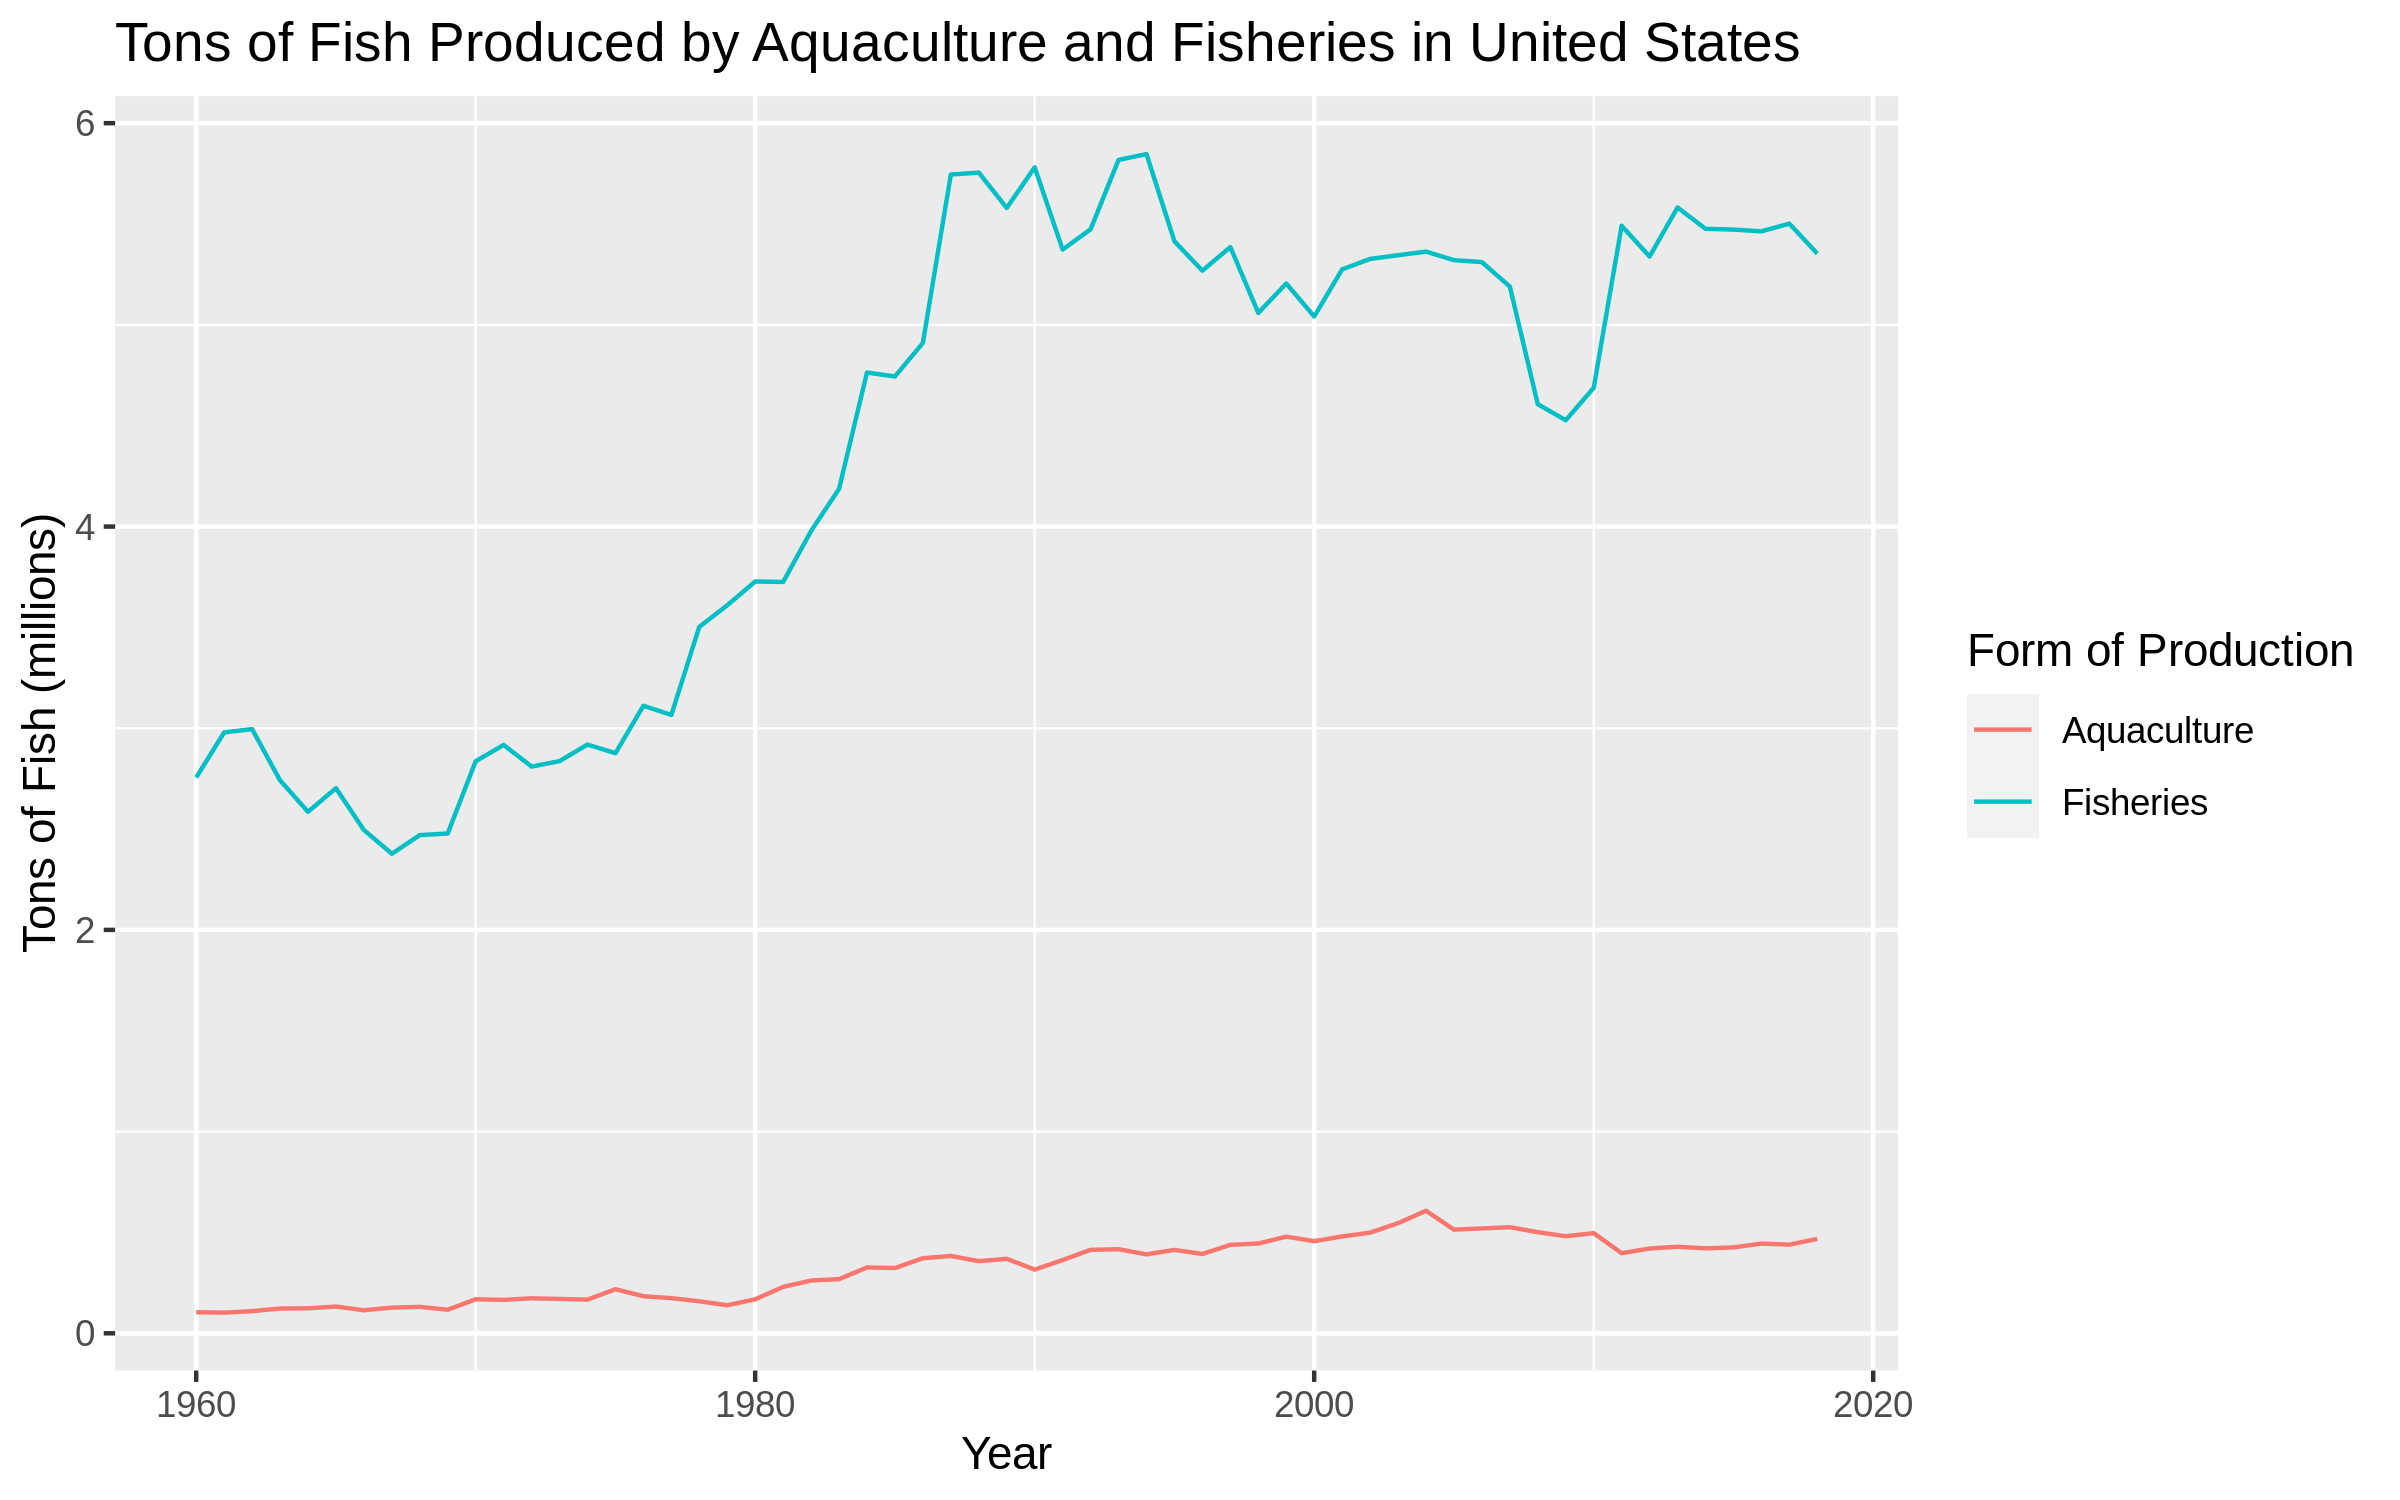

In [42]:
options(repr.plot.width=8, repr.plot.height=5)

data_usa = project_data[which(project_data$code=='USA'),]
data_usa_1 = data_usa %>% pivot_longer(cols = c(aquaculture_prod, fishery_prod))
p = ggplot(data_usa_1, aes(x=year, y=(value/1000000), group=name, color=name))
p = p + labs(title = "Tons of Fish Produced by Aquaculture and Fisheries in United States", y="Tons of Fish (millions)", x="Year")
p = p + geom_line()
p = p + scale_color_discrete(name="Form of Production", labels = c("Aquaculture", "Fisheries"))
p

It is apparent from the graph that the United States has always produced a very small amount of its total fish stocks through aquaculture. Even as the country's fish consumption increased significant between 1970 and 1990, the fish produced through aquaculture remained relatively stagnant. Since the year 2004, it appears that the amount of fish we produce through aquaculture has actually decreased.

As a world leader, many countries look up to the United States as a role model. It's alarming to see that the message that we send to the world with our fish production is negative. In an age where climate change is occuring at an alarming rate and world leaders are pushing to make changes, we cannot just let this fish production issue go unheard. While yes, there are other major issues that need tending to in the United States, this is something that can feasibly be solved. Look at China, for example. Their country has more than four times the population of the United States, yet they produce over 80% of their fish through aquaculture. There is no excuse, we should push for our country to do the same. If we all work hard to preserve global fish stocks, then we create a healthier aquatic ecosystem and a better tomorrow.